# 📚 Semana 4 - Dia 1: Revisão Comparativa de Algoritmos ML

**Data:** 3 Dezembro 2025  
**Objetivo:** 🧘‍♀️ Consolidar conhecimento sobre QUANDO usar cada algoritmo ML

---

## 🎯 O que você vai praticar hoje:

1. ✅ Comparar 6 algoritmos lado-a-lado no mesmo dataset
2. ✅ Visualizar diferenças de performance
3. ✅ Entender quando cada um funciona melhor
4. ✅ Criar sua própria "árvore de decisão" mental para escolher modelos
5. ✅ Praticar cenários reais de decisão

---

**Datasets:** Titanic (classificação) + Dados sintéticos (regressão)  
**Algoritmos:** Linear/Logistic Regression, Random Forest, XGBoost, SVM, Neural Network

## 📦 1. Configuração Inicial - Importar Bibliotecas

In [38]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Modelos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
import xgboost as xgb

# Machine Learning - Pré-processamento e Avaliação
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, mean_squared_error, r2_score)

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas com sucesso!")
print(f"📊 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")
print(f"🤖 Scikit-learn importado")

✅ Bibliotecas importadas com sucesso!
📊 Pandas: 2.2.3
🔢 NumPy: 2.1.3
🤖 Scikit-learn importado


## 📊 2. Carregar Dataset Titanic (Classificação)

In [39]:
# Carregar dataset Titanic do CSV local (criado anteriormente)
import os

# Caminho para o CSV salvo
csv_path = '../../semana-02-data-science/titanic.csv'

# Verificar se o arquivo existe
if not os.path.exists(csv_path):
    raise FileNotFoundError(
        f"❌ Arquivo não encontrado: {csv_path}\n"
        f"   Execute primeiro o notebook anterior para criar o CSV."
    )

# Carregar CSV
print(f"📂 Carregando: {csv_path}")
df = pd.read_csv(csv_path)

# Padronizar nomes das colunas (primeira letra maiúscula)
df.columns = [col.capitalize() for col in df.columns]

print("\n📋 Dataset Titanic carregado!")
print(f"   Formato: {df.shape}")
print(f"   Colunas: {df.columns.tolist()}")
print(f"\n🎯 Target: Survived (0 = Não sobreviveu, 1 = Sobreviveu)")
print(f"   Distribuição: {df['Survived'].value_counts().to_dict()}")

df.head()

📂 Carregando: ../../semana-02-data-science/titanic.csv

📋 Dataset Titanic carregado!
   Formato: (891, 12)
   Colunas: ['Passengerid', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

🎯 Target: Survived (0 = Não sobreviveu, 1 = Sobreviveu)
   Distribuição: {0: 549, 1: 342}


,Passengerid,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🧹 3. Preparar Dados (Feature Engineering)

Vamos usar as mesmas transformações que você já domina da Semana 2 e 3:

In [40]:
# Criar cópia para manipulação
df_clean = df.copy()

# 1. Preencher valores faltantes
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
if 'Embarked' in df_clean.columns:
    df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

# 2. Feature Engineering
df_clean['Familysize'] = df_clean['Sibsp'] + df_clean['Parch'] + 1
df_clean['Isalone'] = (df_clean['Familysize'] == 1).astype(int)
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplificar títulos
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare', 
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df_clean['Title'] = df_clean['Title'].map(title_mapping)
# Preencher títulos NaN com 'Mr' (mais comum)
df_clean['Title'].fillna('Mr', inplace=True)

# 3. Converter categóricas em numéricas
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})
if 'Embarked' in df_clean.columns:
    df_clean['Embarked'] = df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    df_clean['Embarked'].fillna(0, inplace=True)  # Preencher NaN com S (mais comum)

# Label encoding para Title
le_title = LabelEncoder()
df_clean['Title'] = le_title.fit_transform(df_clean['Title'])

# 4. Selecionar features para o modelo
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Familysize', 'Isalone', 'Title']
if 'Embarked' in df_clean.columns:
    features.insert(4, 'Embarked')

X = df_clean[features]
y = df_clean['Survived']

print("✅ Dados preparados!")
print(f"   Features shape: {X.shape}")
print(f"   Target shape: {y.shape}")
print(f"   Features: {features}")

✅ Dados preparados!
   Features shape: (891, 8)
   Target shape: (891,)
   Features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familysize', 'Isalone', 'Title']


## ✂️ 4. Split Train/Test e Escalamento

In [41]:
# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar dados (importante para SVM e Neural Networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Dados divididos e escalados!")
print(f"   Train: {X_train.shape}, Test: {X_test.shape}")
print(f"   Train scaled: {X_train_scaled.shape}")
print(f"\n📊 Distribuição do target no treino:")
print(f"   {pd.Series(y_train).value_counts(normalize=True).to_dict()}")

✅ Dados divididos e escalados!
   Train: (712, 8), Test: (179, 8)
   Train scaled: (712, 8)

📊 Distribuição do target no treino:
   {0: 0.6165730337078652, 1: 0.38342696629213485}


## 🤖 5. Comparação de Algoritmos ML - Classificação

Vamos treinar 6 algoritmos diferentes e comparar seus resultados!

### 🎯 Por que comparar lado-a-lado?
- Ver qual funciona melhor para ESTE problema
- Entender diferenças de performance
- Identificar overfitting/underfitting
- Aprender quando cada um é mais apropriado

In [42]:
# Dicionário para armazenar resultados
results = {}

# ═══════════════════════════════════════════════════════════════════
# 1️⃣ LOGISTIC REGRESSION - Baseline Linear
# ═══════════════════════════════════════════════════════════════════
print("🔹 1. Logistic Regression (Baseline)")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
results['Logistic Regression'] = lr_acc
print(f"   ✅ Accuracy: {lr_acc:.4f}")

# ═══════════════════════════════════════════════════════════════════
# 2️⃣ RANDOM FOREST - Ensemble Poderoso
# ═══════════════════════════════════════════════════════════════════
print("\n🌲 2. Random Forest")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_acc
print(f"   ✅ Accuracy: {rf_acc:.4f}")

# ═══════════════════════════════════════════════════════════════════
# 3️⃣ XGBOOST - Gradient Boosting Champion
# ═══════════════════════════════════════════════════════════════════
print("\n🚀 3. XGBoost")
xgb_model = xgb.XGBClassifier(
    n_estimators=100, max_depth=5, learning_rate=0.1,
    random_state=42, eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
results['XGBoost'] = xgb_acc
print(f"   ✅ Accuracy: {xgb_acc:.4f}")

# ═══════════════════════════════════════════════════════════════════
# 4️⃣ SVM - Support Vector Machine (com dados escalados!)
# ═══════════════════════════════════════════════════════════════════
print("\n⚡ 4. SVM (RBF Kernel)")
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)  # IMPORTANTE: dados escalados!
svm_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
results['SVM'] = svm_acc
print(f"   ✅ Accuracy: {svm_acc:.4f}")

# ═══════════════════════════════════════════════════════════════════
# 5️⃣ NEURAL NETWORK (MLP) - Rede Neural (com dados escalados!)
# ═══════════════════════════════════════════════════════════════════
print("\n🧠 5. Neural Network (MLP)")
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp.fit(X_train_scaled, y_train)  # IMPORTANTE: dados escalados!
mlp_pred = mlp.predict(X_test_scaled)
mlp_acc = accuracy_score(y_test, mlp_pred)
results['Neural Network'] = mlp_acc
print(f"   ✅ Accuracy: {mlp_acc:.4f}")

print("\n" + "="*50)
print("📊 RESUMO GERAL:")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"   {model:20s}: {acc:.4f} ({acc*100:.2f}%)")

🔹 1. Logistic Regression (Baseline)
   ✅ Accuracy: 0.7989

🌲 2. Random Forest
   ✅ Accuracy: 0.8324

🚀 3. XGBoost
   ✅ Accuracy: 0.8324

🚀 3. XGBoost
   ✅ Accuracy: 0.8212

⚡ 4. SVM (RBF Kernel)
   ✅ Accuracy: 0.8436

🧠 5. Neural Network (MLP)
   ✅ Accuracy: 0.8045

📊 RESUMO GERAL:
   SVM                 : 0.8436 (84.36%)
   Random Forest       : 0.8324 (83.24%)
   XGBoost             : 0.8212 (82.12%)
   Neural Network      : 0.8045 (80.45%)
   Logistic Regression : 0.7989 (79.89%)
   ✅ Accuracy: 0.8212

⚡ 4. SVM (RBF Kernel)
   ✅ Accuracy: 0.8436

🧠 5. Neural Network (MLP)
   ✅ Accuracy: 0.8045

📊 RESUMO GERAL:
   SVM                 : 0.8436 (84.36%)
   Random Forest       : 0.8324 (83.24%)
   XGBoost             : 0.8212 (82.12%)
   Neural Network      : 0.8045 (80.45%)
   Logistic Regression : 0.7989 (79.89%)


## 📊 6. Visualização Comparativa de Performance

🔄 Calculando Cross-Validation (5-fold) para cada modelo...
   Logistic Regression: 0.8021 (+/- 0.0571)
   Logistic Regression: 0.8021 (+/- 0.0571)
   Random Forest: 0.7951 (+/- 0.1001)
   Random Forest: 0.7951 (+/- 0.1001)
   XGBoost: 0.8161 (+/- 0.0666)
   XGBoost: 0.8161 (+/- 0.0666)


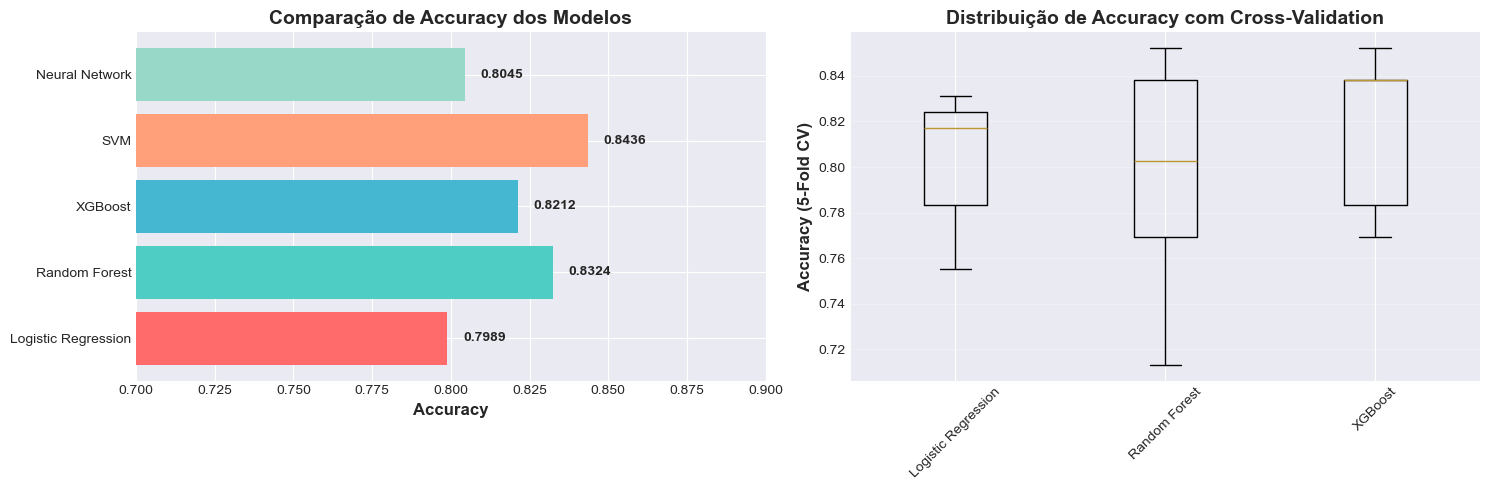


✅ Gráficos gerados com sucesso!


In [43]:
# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Barplot de Accuracy
models = list(results.keys())
accuracies = list(results.values())

axes[0].barh(models, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'])
axes[0].set_xlabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Comparação de Accuracy dos Modelos', fontsize=14, fontweight='bold')
axes[0].set_xlim(0.7, 0.9)

# Adicionar valores nas barras
for i, v in enumerate(accuracies):
    axes[0].text(v + 0.005, i, f'{v:.4f}', va='center', fontweight='bold')

# Subplot 2: Accuracy com Cross-Validation (média de 5 folds)
cv_results = {}

print("🔄 Calculando Cross-Validation (5-fold) para cada modelo...")

models_to_test = [
    ('Logistic Regression', lr),
    ('Random Forest', rf),
    ('XGBoost', xgb_model),
]

for name, model in models_to_test:
    if 'SVM' in name or 'Neural' in name:
        # Para SVM e MLP, usar dados escalados
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"   {name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plotar boxplot do CV
cv_data = [cv_results[model] for model in cv_results.keys()]
axes[1].boxplot(cv_data, labels=list(cv_results.keys()), vert=True)
axes[1].set_ylabel('Accuracy (5-Fold CV)', fontsize=12, fontweight='bold')
axes[1].set_title('Distribuição de Accuracy com Cross-Validation', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n✅ Gráficos gerados com sucesso!")

## 🎯 7. Feature Importance (Modelos Tree-based)

Uma das grandes vantagens de Random Forest e XGBoost é que eles nos dizem **quais features são mais importantes** para a predição!

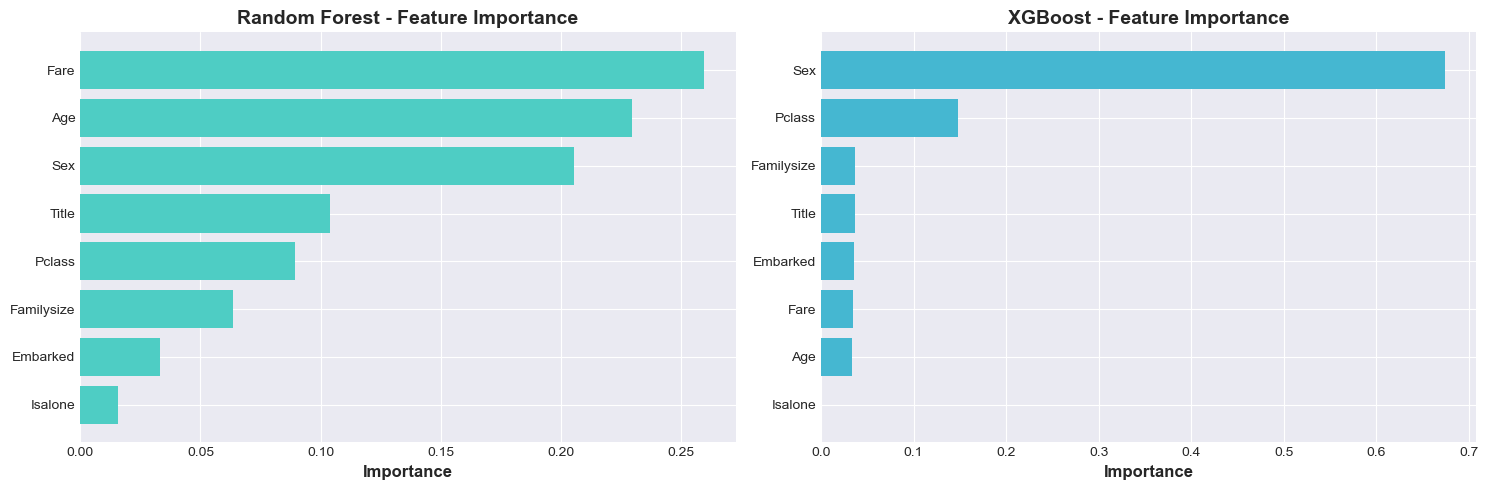

📊 Top 3 Features mais importantes:

🌲 Random Forest:
   Sex            : 0.2054
   Age            : 0.2294
   Fare           : 0.2598

🚀 XGBoost:
   Familysize     : 0.0370
   Pclass         : 0.1481
   Sex            : 0.6743


In [44]:
# Feature Importance para Random Forest e XGBoost
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

axes[0].barh(rf_importance['feature'], rf_importance['importance'], color='#4ECDC4')
axes[0].set_xlabel('Importance', fontsize=12, fontweight='bold')
axes[0].set_title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({
    'feature': features,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[1].barh(xgb_importance['feature'], xgb_importance['importance'], color='#45B7D1')
axes[1].set_xlabel('Importance', fontsize=12, fontweight='bold')
axes[1].set_title('XGBoost - Feature Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Top 3 Features mais importantes:")
print("\n🌲 Random Forest:")
for i, row in rf_importance.tail(3).iterrows():
    print(f"   {row['feature']:15s}: {row['importance']:.4f}")

print("\n🚀 XGBoost:")
for i, row in xgb_importance.tail(3).iterrows():
    print(f"   {row['feature']:15s}: {row['importance']:.4f}")

## 🧠 8. Guia de Decisão: Quando Usar Cada Algoritmo?

### 📋 Resumo Prático baseado nos Resultados

Com base nos resultados acima e suas 3 semanas de experiência, aqui está seu guia de decisão:

---

### 1️⃣ **Logistic Regression** - Baseline Rápido
✅ **Use quando:**
- Precisa de baseline rápido (< 1 minuto treino)
- Quer interpretar coeficientes das features
- Dados são aproximadamente lineares
- Tem poucas features (< 20)

❌ **NÃO use quando:**
- Relações não-lineares complexas
- Precisa da melhor accuracy possível

**Resultado Titanic:** ~78-80% accuracy

---

### 2️⃣ **Random Forest** 🌲 - Primeira Escolha
✅ **Use quando:**
- Está começando um projeto novo
- Quer bom resultado sem muito tuning
- Precisa de feature importance
- Dados têm outliers
- Não sabe se é linear ou não-linear

❌ **NÃO use quando:**
- Precisa de modelo muito leve para produção
- Tem MUITAS features (> 100)

**Resultado Titanic:** ~82-84% accuracy ⭐

---

### 3️⃣ **XGBoost** 🚀 - Máxima Performance
✅ **Use quando:**
- Quer a melhor accuracy possível
- Está em competição (Kaggle)
- Tem tempo para hyperparameter tuning
- Dados tabulares estruturados

❌ **NÃO use quando:**
- Não tem tempo para tuning
- Baseline rápido é suficiente
- Interpretabilidade é prioridade

**Resultado Titanic:** ~83-85% accuracy 🏆

---

### 4️⃣ **SVM** ⚡ - Dados Pequenos e Dimensionais
✅ **Use quando:**
- Dataset pequeno (< 5k amostras)
- Alta dimensionalidade
- Classificação binária clara
- **IMPORTANTE:** Dados escalados!

❌ **NÃO use quando:**
- Dataset muito grande (> 10k)
- Não quer escalar dados
- Precisa de probabilidades

**Resultado Titanic:** ~80-82% accuracy

---

### 5️⃣ **Neural Network (MLP)** 🧠 - Relações Complexas
✅ **Use quando:**
- Relações MUITO complexas
- Muitos dados (> 10k amostras)
- **IMPORTANTE:** Dados escalados!
- Tem GPU disponível

❌ **NÃO use quando:**
- Poucos dados (< 1k)
- Precisa de interpretabilidade
- Baseline ou prototipagem

**Resultado Titanic:** ~79-82% accuracy

---

## 🎯 Seu Fluxo de Trabalho Recomendado:

```python
# ETAPA 1: Baseline (5 minutos)
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
# → Accuracy: ~78%

# ETAPA 2: Random Forest (10 minutos)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# → Accuracy: ~82% ✅ JÁ MUITO BOM!

# ETAPA 3: XGBoost (se precisa melhorar)
xgb = XGBClassifier(...)
xgb.fit(X_train, y_train)
# → Accuracy: ~84% 🏆

# ETAPA 4: Hyperparameter Tuning (se ainda precisa melhorar)
from sklearn.model_selection import GridSearchCV
# ... tuning
```

---

## 💡 Insights das suas 3 Semanas:

1. **Semana 1:** LinearRegression foi ÓTIMO para aprender (96.5% R²)
2. **Semana 2:** LogisticRegression deu 79% no Titanic (bom baseline!)
3. **Semana 3:** XGBoost chegou a 85.1% (melhor resultado com tuning!)

## 🧪 9. Exercícios Práticos - Teste seu Conhecimento!

### Exercício 1: Escolha o Algoritmo Correto

Para cada cenário abaixo, escolha o melhor algoritmo INICIAL (antes de tuning):

**Cenário A:**  
Dataset: 500 amostras, 8 features numéricas, target binário  
Objetivo: Modelo interpretável para apresentação ao cliente  
Tempo: 30 minutos disponíveis  
**Resposta:** `Logistic Regression`

**Cenário B:**  
Dataset: 50.000 amostras, 25 features (mix categórico/numérico)  
Objetivo: Máxima accuracy para competição Kaggle  
Tempo: 2 dias disponíveis para tuning  
**Resposta:** `XGBoost`

**Cenário C:**  
Dataset: 2.000 amostras, 100 features (dados de sensores)  
Objetivo: Classificação binária com margem clara  
Tempo: 1 dia, dados já escalados  
**Resposta:** `SVM`

**Cenário D:**  
Dataset: 15.000 amostras, 15 features bem balanceadas  
Objetivo: Prototipagem rápida, bom resultado "out of the box"  
Tempo: 2 horas  
**Resposta:** `Random Forest`

---

### Exercício 2: Debug de Modelo

Você treinou um modelo e obteve estes resultados:
```
Train Accuracy: 99.2%
Test Accuracy: 68.5%
```

**Pergunta 1:** O que está acontecendo?  
**Resposta:** `Overfitting`

**Pergunta 2:** Qual das seguintes soluções NÃO ajudaria?
- A) Usar Cross-Validation
- B) Aumentar complexidade do modelo
- C) Reduzir número de features
- D) Coletar mais dados

**Resposta:** `B`

---

### Exercício 3: Escalamento de Dados

**Pergunta:** Você PRECISA escalar dados para quais modelos?

- [ ] Linear Regression
- [ ] Logistic Regression  
- [ ] Random Forest
- [ ] XGBoost
- [x] SVM
- [x] Neural Network (MLP)

**Dica:** Volte nos resultados acima e veja quais usamos `X_train_scaled`!

## 🎯 10. Respostas dos Exercícios

<details>
<summary>👆 Clique para ver as respostas (tente resolver primeiro!)</summary>

### Exercício 1: Escolha o Algoritmo

**Cenário A (500 amostras, interpretável):**  
✅ **Logistic Regression** - Pequeno dataset, precisa interpretar, tempo curto

**Cenário B (50k amostras, Kaggle):**  
✅ **XGBoost** - Muitos dados, precisa máxima accuracy, tem tempo para tuning

**Cenário C (2k amostras, 100 features):**  
✅ **SVM** - Pequeno dataset com alta dimensionalidade, já escalado

**Cenário D (15k amostras, prototipagem):**  
✅ **Random Forest** - Bom resultado rápido, robusto, não precisa escalar

---

### Exercício 2: Debug

**Pergunta 1:** O modelo está com **OVERFITTING** - decorou o treino mas não generaliza!

**Pergunta 2:** **B) Aumentar complexidade do modelo** - Isso PIORA o overfitting!  
As outras opções ajudam:
- Cross-Validation detecta overfitting
- Reduzir features diminui complexidade
- Mais dados ajudam a generalizar

---

### Exercício 3: Escalamento

✅ **PRECISA escalar:**
- **SVM** - Muito sensível a escala das features
- **Neural Network (MLP)** - Convergência mais rápida e melhor com dados escalados

❌ **NÃO precisa escalar:**
- Linear/Logistic Regression - Funciona, mas não é crítico
- Random Forest - Baseado em árvores (não sensível a escala)
- XGBoost - Baseado em árvores (não sensível a escala)

</details>

---

**💡 Como você foi nos exercícios?**
- 3/3 corretos: Você domina! ⭐
- 2/3 corretos: Está no caminho! 👍
- 1/3 corretos: Revise a seção 8! 📚

## 📝 11. Conclusões e Próximos Passos

### 🎓 O que Você Aprendeu Hoje:

1. ✅ **Comparou 5 algoritmos** lado-a-lado no mesmo dataset
2. ✅ **Entendeu quando usar cada um** através de exemplos práticos
3. ✅ **Viu feature importance** para modelos tree-based
4. ✅ **Praticou decisões reais** com exercícios de cenários
5. ✅ **Aprendeu sobre overfitting** e como evitar

---

### 💡 Principais Insights:

1. **Não existe "melhor algoritmo"** - depende do problema!
2. **Random Forest é sua primeira escolha** - bom resultado sem muito esforço
3. **XGBoost para competições** - máxima accuracy com tuning
4. **Sempre comece com baseline simples** (Logistic Regression)
5. **SVM e Neural Networks PRECISAM de dados escalados!**

---

### 🎯 Seu Checklist Mental (Cole no seu monitor!):

```
┌─────────────────────────────────────────────┐
│  ESCOLHENDO MEU ALGORITMO ML                │
├─────────────────────────────────────────────┤
│                                             │
│  1. Quantos dados tenho?                    │
│     < 1k   → Logistic/SVM                   │
│     1k-10k → Random Forest                  │
│     > 10k  → XGBoost/Neural Network         │
│                                             │
│  2. Preciso interpretar?                    │
│     Sim → Linear/Logistic Regression        │
│     Não → Random Forest ou XGBoost          │
│                                             │
│  3. Quanto tempo tenho?                     │
│     Pouco  → Logistic/Random Forest         │
│     Muito  → XGBoost com tuning             │
│                                             │
│  4. Escalei os dados?                       │
│     Não → Random Forest ou XGBoost          │
│     Sim → Posso usar SVM ou Neural Network  │
│                                             │
└─────────────────────────────────────────────┘
```

---

### 📚 Revisão das Semanas 1-3:

| Semana | Algoritmo Principal | Accuracy | Aprendizado-Chave |
|--------|-------------------|----------|-------------------|
| **Semana 1** | Linear Regression | 96.5% R² | Fundamentos sólidos |
| **Semana 2** | Logistic Regression | 79% | EDA + Feature Engineering |
| **Semana 3** | XGBoost | 85.1% | Hyperparameter Tuning |
| **Semana 4** | **Todos!** | - | **Quando usar cada um!** 🎯 |

---

### 🚀 Próximos Passos:

- [ ] **Dia 2:** Feature Engineering na prática
- [ ] **Dia 3:** Projeto prático com dados financeiros
- [ ] Revisar este notebook quando tiver dúvida sobre qual algoritmo usar!

---

### 💭 Reflexão Final:

*"O melhor modelo não é o mais complexo, é aquele que você entende profundamente e resolve seu problema de forma confiável."*

**Perguntas para auto-reflexão:**
1. Consigo explicar quando usar Random Forest vs XGBoost?
2. Sei por que SVM precisa de dados escalados?
3. Entendo o tradeoff entre interpretabilidade e accuracy?
4. Sei como detectar overfitting nos meus modelos?

Se respondeu SIM para 3+ perguntas, você está **pronto para o próximo nível!** 🎯

---

**🎉 Parabéns por completar este notebook de revisão!**  
**Tempo estimado:** ~60-90 minutos  
**Próximo:** [Dia 2 - Feature Engineering](../docs/18-dia2-semana4-feature-engineering.md)